**Analysis 2**

In [3]:
# imports
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 40)
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
import plotly.express as px
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore');

In [4]:
df = pd.read_csv("CARSSSS.csv")
# to display the top 5 rows
df.head(5)


,Make,Model,Variant,Price,Displacement,Cylinders,Drivetrain,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Doors,City_Mileage,ARAI_Certified_Mileage,Power,Torque,Type,Wheelbase
0,Tata,Nano Genx,Xt,"292,667",624.0,2.0,RWD (Rear Wheel Drive),Injection,24.0,Petrol,1652.0,3164.0,1750.0,5.0,23.6,23.6,38.0,51.0,Manual,2230.0
1,Tata,Nano Genx,Xe,"236,447",624.0,2.0,RWD (Rear Wheel Drive),Injection,24.0,Petrol,1652.0,3164.0,1750.0,5.0,23.6,23.6,38.0,51.0,Manual,2230.0
2,Tata,Nano Genx,Emax Xm,"296,661",624.0,2.0,RWD (Rear Wheel Drive),Injection,15.0,CNG,1652.0,3164.0,1750.0,4.0,NaN,NaN,38.0,51.0,Manual,2230.0
3,Tata,Nano Genx,Xta,"334,768",624.0,2.0,RWD (Rear Wheel Drive),Injection,24.0,Petrol,1652.0,3164.0,1750.0,5.0,23.6,21.9,38.0,51.0,Automatic,2230.0
4,Tata,Nano Genx,Xm,"272,223",624.0,2.0,RWD (Rear Wheel Drive),Injection,24.0,Petrol,1652.0,3164.0,1750.0,5.0,23.6,23.6,38.0,51.0,Manual,2230.0


In [5]:
df.tail(5)

,Make,Model,Variant,Price,Displacement,Cylinders,Drivetrain,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Doors,City_Mileage,ARAI_Certified_Mileage,Power,Torque,Type,Wheelbase
1271,Honda,City,Vx Mt Diesel,"1,302,000",1498.0,4.0,FWD (Front Wheel Drive),Injection,40.0,Diesel,1495.0,4440.0,1695.0,4.0,22.6,25.10,100.0,200.0,Manual,2600.0
1272,Honda,City,Zx Mt Diesel,"1,421,000",1498.0,4.0,FWD (Front Wheel Drive),Injection,40.0,Diesel,1495.0,4440.0,1695.0,4.0,22.6,25.10,100.0,200.0,Manual,2600.0
1273,Honda,City,Zx Cvt Petrol,"1,431,000",1497.0,4.0,FWD (Front Wheel Drive),Injection,40.0,Petrol,1495.0,4440.0,1695.0,4.0,18,22.60,119.0,145.0,Automatic,2600.0
1274,Honda,City,V Cvt Petrol,"1,201,000",1497.0,4.0,FWD (Front Wheel Drive),Injection,40.0,Petrol,1495.0,4440.0,1695.0,4.0,14.3,17.80,119.0,145.0,Automatic,2600.0
1275,Mitsubishi,Montero,3.2 At,"6,862,560",3200.0,4.0,AWD (All Wheel Drive),Injection,88.0,Diesel,1900.0,4900.0,1875.0,5.0,8.25,11.56,202.0,441.0,Automatic,2780.0


Checking the type of data

In [6]:
df.dtypes

Make                       object
Model                      object
Variant                    object
Price                      object
Displacement              float64
Cylinders                 float64
Drivetrain                 object
Fuel_System                object
Fuel_Tank_Capacity        float64
Fuel_Type                  object
Height                    float64
Length                    float64
Width                     float64
Doors                     float64
City_Mileage               object
ARAI_Certified_Mileage    float64
Power                     float64
Torque                    float64
Type                       object
Wheelbase                 float64
dtype: object

Dropping the duplicate rows

In [7]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (9, 20)


In [8]:
df.count()   #used to count the number of rows

Make                      1201
Model                     1276
Variant                   1276
Price                     1276
Displacement              1264
Cylinders                 1210
Drivetrain                1269
Fuel_System               1268
Fuel_Tank_Capacity        1207
Fuel_Type                 1276
Height                    1275
Length                    1276
Width                     1264
Doors                     1272
City_Mileage               721
ARAI_Certified_Mileage    1162
Power                     1276
Torque                    1274
Type                      1275
Wheelbase                 1256
dtype: int64

In [9]:
df = df.drop_duplicates()
df.head(5)

,Make,Model,Variant,Price,Displacement,Cylinders,Drivetrain,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Doors,City_Mileage,ARAI_Certified_Mileage,Power,Torque,Type,Wheelbase
0,Tata,Nano Genx,Xt,"292,667",624.0,2.0,RWD (Rear Wheel Drive),Injection,24.0,Petrol,1652.0,3164.0,1750.0,5.0,23.6,23.6,38.0,51.0,Manual,2230.0
1,Tata,Nano Genx,Xe,"236,447",624.0,2.0,RWD (Rear Wheel Drive),Injection,24.0,Petrol,1652.0,3164.0,1750.0,5.0,23.6,23.6,38.0,51.0,Manual,2230.0
2,Tata,Nano Genx,Emax Xm,"296,661",624.0,2.0,RWD (Rear Wheel Drive),Injection,15.0,CNG,1652.0,3164.0,1750.0,4.0,NaN,NaN,38.0,51.0,Manual,2230.0
3,Tata,Nano Genx,Xta,"334,768",624.0,2.0,RWD (Rear Wheel Drive),Injection,24.0,Petrol,1652.0,3164.0,1750.0,5.0,23.6,21.9,38.0,51.0,Automatic,2230.0
4,Tata,Nano Genx,Xm,"272,223",624.0,2.0,RWD (Rear Wheel Drive),Injection,24.0,Petrol,1652.0,3164.0,1750.0,5.0,23.6,23.6,38.0,51.0,Manual,2230.0


In [10]:
df.count()

Make                      1192
Model                     1267
Variant                   1267
Price                     1267
Displacement              1255
Cylinders                 1201
Drivetrain                1260
Fuel_System               1259
Fuel_Tank_Capacity        1198
Fuel_Type                 1267
Height                    1266
Length                    1267
Width                     1255
Doors                     1263
City_Mileage               713
ARAI_Certified_Mileage    1153
Power                     1267
Torque                    1265
Type                      1266
Wheelbase                 1247
dtype: int64

Dropping the missing or null values

In [11]:
print(df.isnull().sum())

Make                       75
Model                       0
Variant                     0
Price                       0
Displacement               12
Cylinders                  66
Drivetrain                  7
Fuel_System                 8
Fuel_Tank_Capacity         69
Fuel_Type                   0
Height                      1
Length                      0
Width                      12
Doors                       4
City_Mileage              554
ARAI_Certified_Mileage    114
Power                       0
Torque                      2
Type                        1
Wheelbase                  20
dtype: int64


In [12]:
df = df.dropna()    # Dropping the missing values.
df.count()

Make                      608
Model                     608
Variant                   608
Price                     608
Displacement              608
Cylinders                 608
Drivetrain                608
Fuel_System               608
Fuel_Tank_Capacity        608
Fuel_Type                 608
Height                    608
Length                    608
Width                     608
Doors                     608
City_Mileage              608
ARAI_Certified_Mileage    608
Power                     608
Torque                    608
Type                      608
Wheelbase                 608
dtype: int64

In [13]:
print(df.isnull().sum())   # After dropping the values

Make                      0
Model                     0
Variant                   0
Price                     0
Displacement              0
Cylinders                 0
Drivetrain                0
Fuel_System               0
Fuel_Tank_Capacity        0
Fuel_Type                 0
Height                    0
Length                    0
Width                     0
Doors                     0
City_Mileage              0
ARAI_Certified_Mileage    0
Power                     0
Torque                    0
Type                      0
Wheelbase                 0
dtype: int64


**Converting the object values to integer type.**

While having a look at the data, the Price was stored as an object type. This is a serious problem because it is impossible to plot those values on a graph because it is a primary requirement that during plotting a graph all the values must be of type integer data. The author has stored, the Price in a different format (Rs2,34,000) so I had to remove the formatting and then convert them to an integer.

In [14]:
# Removing the formatting
df['Price'] = df['Price'].astype(str)
df['Price'] = [x.replace('Rs',' ') for x in df['Price']]
df['Price'] = [x.replace(',', '') for x in df['Price']]  

In [15]:
df['Price']=pd.to_numeric(df['Price'],errors='coerce')

**Detecting Outliers**

An outlier is a point or set of points different from other points. Sometimes they can be very high or very low. It’s often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Hence it’s a good idea to remove them. I will perform the IQR score technique to detect and remove the outliers. Often outliers can be seen with visualizations using a box plot. Shown below is the box plot of Price. In the plot, you can find some points are outside the box they are none other than outliers.

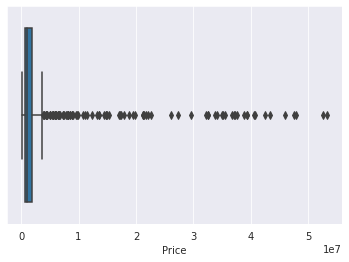

In [16]:
sns.boxplot(x=df['Price'])

In [17]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Price                     1232466.25
Displacement                  801.00
Cylinders                       0.00
Fuel_Tank_Capacity             20.00
Height                        177.00
Length                        590.25
Width                         155.00
Doors                           1.00
ARAI_Certified_Mileage          7.14
Power                          73.50
Torque                        205.00
Wheelbase                     240.00
dtype: float64


In [18]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

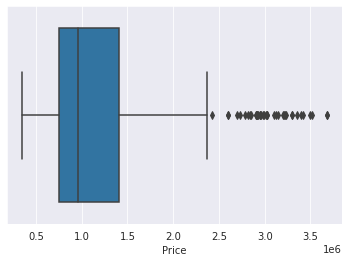

In [19]:
sns.boxplot(x=df['Price'])

After using the technique now as seen above the Price box plot contains no outlier points.

**Histogram** 

Histogram refers to the frequency of occurrence of variables in an interval

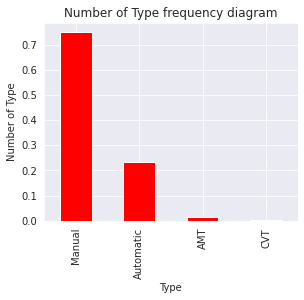

In [24]:
plt.figure(1)
plt.subplot(221)
df['Type'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='red')
plt.title("Number of Type frequency diagram")
plt.ylabel('Number of Type')
plt.xlabel('Type');




-More than 70 % of the vehicle is Manual type Car

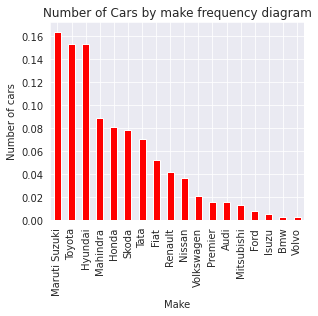

In [26]:
plt.figure(1)
plt.subplot(221)
df['Make'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='red')
plt.title("Number of Cars by make frequency diagram")
plt.ylabel('Number of cars')
plt.xlabel('Make');


Most produced vehicle are of body style Maruti Suzuki around 165% followed by Toyota and hyundai 150%



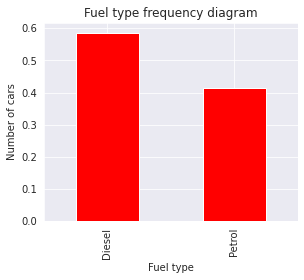

In [27]:
plt.figure(1)
plt.subplot(221)
df['Fuel_Type'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='red')
plt.title("Fuel type frequency diagram")
plt.ylabel('Number of cars')
plt.xlabel('Fuel type');

-More than 50 % of the vehicle is a Diesel type Car

**Box plot of Price of every body type**

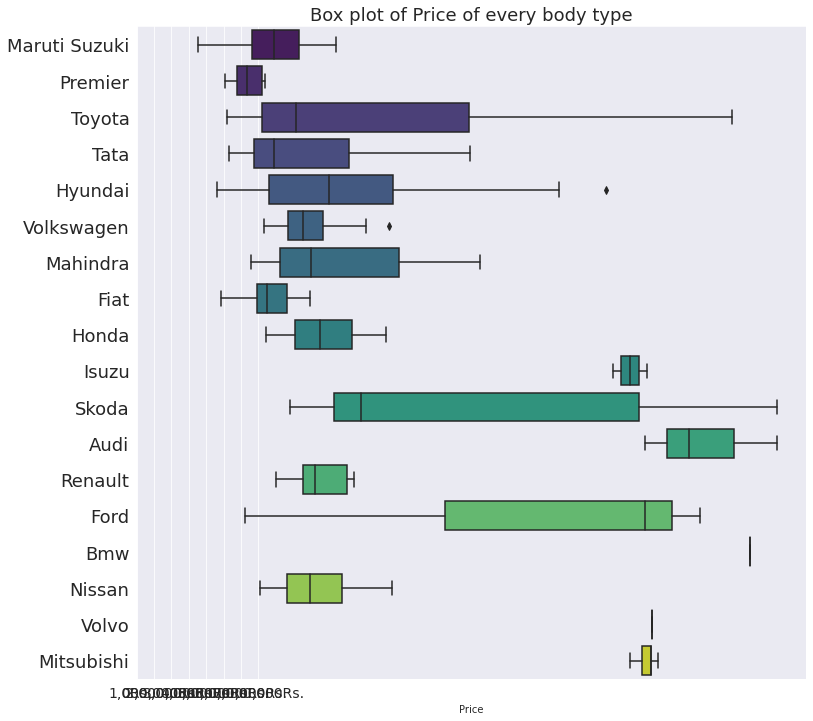

In [20]:
plt.figure(figsize=(12,12))
sns.boxplot(data=df, x='Price', y='Make', palette='viridis')
plt.title('Box plot of Price of every body type',fontsize=18)
plt.ylabel('')
plt.yticks(fontsize=18)
plt.xticks([i for i in range(0,800000,100000)],[f'{i:,}Rs.' for i in range(0,8000000,1000000)],fontsize=14);

It's Clear that Car body type strongly affect the price

**Performing a 5 number summary (min, lower quartile, median, upper quartile, max)**

Next step is to perform a 5-number summary for the numeric data. As discussed earlier the numeric data, in this case, are Price, Displacement, Cylinders, Fuel_Tank_Capacity,Height,length,width, Wheelbase,doors,seating_capacity. The five-number summary includes minimum, lower quartile, median, upper quartile, and the maximum values all these values can be obtained by using the describe method.

In [21]:
df.describe()

,Price,Displacement,Cylinders,Fuel_Tank_Capacity,Height,Length,Width,Doors,ARAI_Certified_Mileage,Power,Torque,Wheelbase
count,3.850000e+02,385.000000,385.0,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
mean,1.226583e+06,1580.457143,4.0,49.675325,1602.984416,4270.612987,1752.706494,4.657143,18.905844,107.114545,206.267013,2596.602597
std,7.225448e+05,432.817951,0.0,10.339852,131.578972,324.820541,76.297045,0.486117,4.117865,34.031971,82.153540,123.979713
min,3.521360e+05,1172.000000,4.0,32.000000,1416.000000,3675.000000,1475.000000,3.000000,10.010000,63.000000,96.000000,2350.000000
25%,7.516930e+05,1248.000000,4.0,43.000000,1505.000000,3995.000000,1695.000000,4.000000,15.960000,83.000000,145.000000,2500.000000
50%,9.641990e+05,1461.000000,4.0,45.000000,1555.000000,4315.000000,1735.000000,5.000000,18.600000,90.000000,197.000000,2590.000000
75%,1.407871e+06,1598.000000,4.0,55.000000,1671.000000,4490.000000,1815.000000,5.000000,21.400000,128.000000,245.000000,2673.000000
max,3.678599e+06,2999.000000,4.0,80.000000,1930.000000,5118.000000,2060.000000,5.000000,28.400000,190.000000,450.000000,3040.000000
